In [3]:
#Importing libraries for sentiment analysis

import tweepy        
import pandas as pd  
import numpy as np   


#For plotting and visualization

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
# We import our access keys:
from credential import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_key)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [7]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

....between our two countries. I look forward to continuing those discussions after the Israeli Elections when we m… https://t.co/QXy0OiGPpo

I had a call today with Prime Minister Netanyahu to discuss the possibility of moving forward with a Mutual Defense… https://t.co/DSJfqyZLf0

RT @RepDougCollins: #FISA oversight falls squarely within the Judiciary Committee’s jurisdiction. We must address concerns outlined in the…

RT @RepMarkMeadows: The IG report on potential FISA abuse is complete. Now being reviewed. Huge.

Documents we’ve seen leave little to zero…

KEEP AMERICA GREAT!



In [8]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,....between our two countries. I look forward ...
1,I had a call today with Prime Minister Netanya...
2,RT @RepDougCollins: #FISA oversight falls squa...
3,RT @RepMarkMeadows: The IG report on potential...
4,KEEP AMERICA GREAT!
5,MAKE AMERICA GREAT AGAIN!
6,94% Approval Rating in the Republican Party! T...
7,RT @realDonaldTrump: The two big Congressional...
8,"Who the hell is Joy-Ann Reid? Never met her, s..."
9,“A Very Stable Genius!” Thank you.


In [9]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [10]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1172887122757525504
2019-09-14 14:57:35
Twitter for iPhone
26125
5542
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/QXy0OiGPpo', 'expanded_url': 'https://twitter.com/i/web/status/1172887122757525504', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


In [11]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [12]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,....between our two countries. I look forward ...,140,1172887122757525504,2019-09-14 14:57:35,Twitter for iPhone,26125,5542
1,I had a call today with Prime Minister Netanya...,140,1172887121704706048,2019-09-14 14:57:35,Twitter for iPhone,33052,7668
2,RT @RepDougCollins: #FISA oversight falls squa...,139,1172874441531043840,2019-09-14 14:07:12,Twitter for iPhone,0,6840
3,RT @RepMarkMeadows: The IG report on potential...,140,1172874318625280002,2019-09-14 14:06:43,Twitter for iPhone,0,7386
4,KEEP AMERICA GREAT!,19,1172860069760946178,2019-09-14 13:10:05,Twitter for iPhone,58927,12322
5,MAKE AMERICA GREAT AGAIN!,25,1172859963963822080,2019-09-14 13:09:40,Twitter for iPhone,118675,22142
6,94% Approval Rating in the Republican Party! T...,140,1172859771575328768,2019-09-14 13:08:54,Twitter for iPhone,36028,7679
7,RT @realDonaldTrump: The two big Congressional...,140,1172858789265072137,2019-09-14 13:05:00,Twitter for iPhone,0,17939
8,"Who the hell is Joy-Ann Reid? Never met her, s...",140,1172858577951821825,2019-09-14 13:04:10,Twitter for iPhone,49038,11165
9,“A Very Stable Genius!” Thank you.,34,1172853679642333185,2019-09-14 12:44:42,Twitter for iPhone,44166,9380


In [13]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 116.815


In [14]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
https://t.co/WqBj8iMQhx
Number of likes: 206828
23 characters.

The tweet with more retweets is: 
RT @realDonaldTrump: https://t.co/J3aTzBG7ao
Number of retweets: 51820
44 characters.



In [15]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

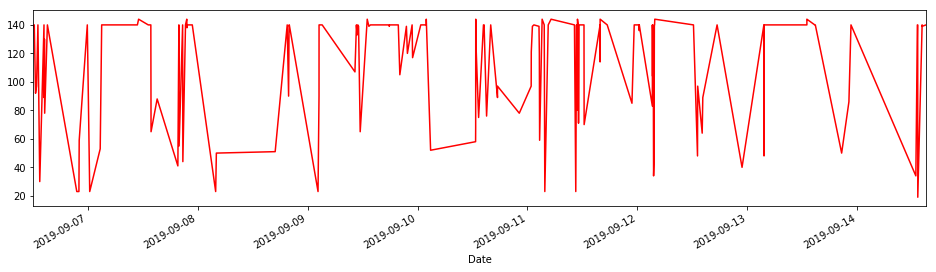

In [16]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

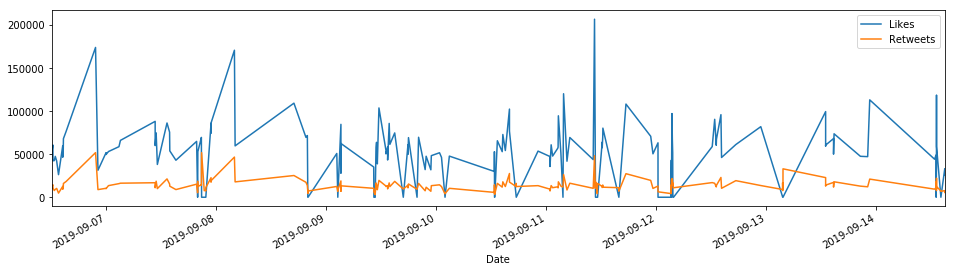

In [17]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [18]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone


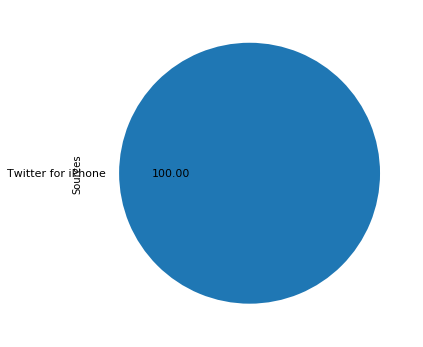

In [19]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [21]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [22]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,....between our two countries. I look forward ...,140,1172887122757525504,2019-09-14 14:57:35,Twitter for iPhone,26125,5542,0
1,I had a call today with Prime Minister Netanya...,140,1172887121704706048,2019-09-14 14:57:35,Twitter for iPhone,33052,7668,0
2,RT @RepDougCollins: #FISA oversight falls squa...,139,1172874441531043840,2019-09-14 14:07:12,Twitter for iPhone,0,6840,0
3,RT @RepMarkMeadows: The IG report on potential...,140,1172874318625280002,2019-09-14 14:06:43,Twitter for iPhone,0,7386,1
4,KEEP AMERICA GREAT!,19,1172860069760946178,2019-09-14 13:10:05,Twitter for iPhone,58927,12322,1
5,MAKE AMERICA GREAT AGAIN!,25,1172859963963822080,2019-09-14 13:09:40,Twitter for iPhone,118675,22142,1
6,94% Approval Rating in the Republican Party! T...,140,1172859771575328768,2019-09-14 13:08:54,Twitter for iPhone,36028,7679,1
7,RT @realDonaldTrump: The two big Congressional...,140,1172858789265072137,2019-09-14 13:05:00,Twitter for iPhone,0,17939,1
8,"Who the hell is Joy-Ann Reid? Never met her, s...",140,1172858577951821825,2019-09-14 13:04:10,Twitter for iPhone,49038,11165,1
9,“A Very Stable Genius!” Thank you.,34,1172853679642333185,2019-09-14 12:44:42,Twitter for iPhone,44166,9380,1


In [23]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [24]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 49.5%
Percentage of neutral tweets: 34.0%
Percentage de negative tweets: 16.5%
